In [668]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from matplotlib import style
style.use('ggplot')
import plotly
import plotly.express as px        # A wrapper of plotly
import plotly.graph_objects as go  # Used for plotly in a object oriented way

import cufflinks as cf             # Binds pandas and plotly
import plotly.offline as pyo       # using plotly offline
from plotly.offline import init_notebook_mode,plot,iplot

from plotly.subplots import make_subplots
pd.set_option('display.max_columns', 500)

In [669]:
pyo.init_notebook_mode(connected=True)
cf.go_offline()

In [670]:
india = pd.read_csv(r"C:\Users\kulka\Desktop\AV_Hackathon_Codes\Plotly_Covid\Data\covid_19_india.csv",parse_dates=['Date'],dayfirst=True)
india.drop(['Time','Sno'],axis=1,inplace=True)

population = pd.read_csv(r"C:\Users\kulka\Desktop\AV_Hackathon_Codes\Plotly_Covid\Data\population_india_census2011.csv")
population.drop("Sno",axis=1,inplace=True)

beds = pd.read_csv(r"C:\Users\kulka\Desktop\AV_Hackathon_Codes\Plotly_Covid\Data\HospitalBedsIndia.csv",nrows=36)
beds.drop("Sno",axis=1,inplace=True)

patients = pd.read_csv(r"C:\Users\kulka\Desktop\AV_Hackathon_Codes\Plotly_Covid\Data\IndividualDetails.csv",parse_dates=['diagnosed_date','status_change_date'],dayfirst=True)
patients.drop(['id','government_id'],axis=1,inplace=True)

In [671]:
initial_data = india.merge(population,left_on='State/UnionTerritory',right_on='State / Union Territory',how='left')
initial_data.drop("State / Union Territory",axis=1,inplace=True)

data = initial_data.merge(beds,left_on="State/UnionTerritory",right_on="State/UT",how='left')
data.drop("State/UT",axis=1,inplace=True)

In [672]:
data['Active'] = data['Confirmed']-data['Cured']-data['Deaths']

In [673]:
india.shape, population.shape, beds.shape, data.shape

((1478, 7), (36, 7), (36, 11), (1478, 24))

In [674]:
print ("The First Case in India was reported on {}".format(data['Date'].min()))
print ("The Latest Case in India is reported on {}".format(data['Date'].max()))

The First Case in India was reported on 2020-01-30 00:00:00
The Latest Case in India is reported on 2020-04-30 00:00:00


The first case in India was reported on 30th of January and the latest case is reported on 30th of March.

Maharashtra has the highest number of cases followed by Gujarat and Delhi.

Most of the North Eastern states have less number of cases reported except West Bengal.

In [675]:
df = data[data['Date'] == data['Date'].max()].groupby("State/UnionTerritory")['Confirmed'].sum().sort_values(ascending=False).to_frame()
df.style.background_gradient(cmap='Reds')

,Confirmed
State/UnionTerritory,
Maharashtra,9915
Gujarat,4082
Delhi,3439
Madhya Pradesh,2660
Rajasthan,2438
Uttar Pradesh,2203
Tamil Nadu,2162
Andhra Pradesh,1403
Telengana,1012


#### Number of Confirmed, Active, Deaths and Cured cases in India

In [676]:
df = data.groupby('Date')[['Confirmed','Deaths','Cured','Active']].sum()

In [677]:
fig = go.Figure(data=[
    go.Bar(name='Confirmed', x=df.index, y=df['Confirmed'],marker_color='blue',marker_line_color='black'),
    go.Bar(name='Cured', x=df.index, y=df['Cured'],marker_color='green',marker_line_color='black'),
    go.Bar(name='Deaths', x=df.index, y=df['Deaths'],marker_color='red',marker_line_color='black'),
    go.Bar(name='Active', x=df.index, y=df['Active'],marker_color='black',marker_line_color='black'),
])
fig.update_layout(title='Number of Confirmed,Recovered,Deaths in India',barmode='relative',xaxis=dict(title="Date"),yaxis=dict(title="Count"))

We can see the cases increasing on a daily basis and consistently.We can also see the Number of Confirmed, Deaths, Cured and Active cases following the same trajectory.

#### Top 10 Infected States (Including Karnataka)

In [678]:
Maharashtra = data[data['State/UnionTerritory'] == "Maharashtra"].groupby("Date")['Confirmed'].sum().to_frame()
Gujarat = data[data['State/UnionTerritory'] == "Gujarat"].groupby("Date")['Confirmed'].sum().to_frame()
Delhi = data[data['State/UnionTerritory'] == "Delhi"].groupby("Date")['Confirmed'].sum().to_frame()
Madhya_Pradesh = data[data['State/UnionTerritory'] == "Madhya Pradesh"].groupby("Date")['Confirmed'].sum().to_frame()
Rajasthan = data[data['State/UnionTerritory'] == "Rajasthan"].groupby("Date")['Confirmed'].sum().to_frame()
Uttar_Pradesh = data[data['State/UnionTerritory'] == "Uttar Pradesh"].groupby("Date")['Confirmed'].sum().to_frame()
Tamil_Nadu = data[data['State/UnionTerritory'] == "Tamil Nadu"].groupby("Date")['Confirmed'].sum().to_frame()
Andhra_Pradesh = data[data['State/UnionTerritory'] == "Andhra Pradesh"].groupby("Date")['Confirmed'].sum().to_frame()
Telangana = data[data['State/UnionTerritory'] == "Telangana"].groupby("Date")['Confirmed'].sum().to_frame()
West_Bengal = data[data['State/UnionTerritory'] == "West Bengal"].groupby("Date")['Confirmed'].sum().to_frame()
Karnataka = data[data['State/UnionTerritory'] == "Karnataka"].groupby("Date")['Confirmed'].sum().to_frame()

In [679]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=Maharashtra.index,y=Maharashtra['Confirmed'],mode='lines+markers',name="Maharashtra"))
fig.add_trace(go.Scatter(x=Gujarat.index,y=Gujarat['Confirmed'],mode='lines+markers',name="Gujarat"))
fig.add_trace(go.Scatter(x=Delhi.index,y=Delhi['Confirmed'],mode='lines+markers',name="Delhi"))
fig.add_trace(go.Scatter(x=Madhya_Pradesh.index,y=Madhya_Pradesh['Confirmed'],mode='lines+markers',name="Madhya_Pradesh"))
fig.add_trace(go.Scatter(x=Rajasthan.index,y=Rajasthan['Confirmed'],mode='lines+markers',name="Rajasthan"))
fig.add_trace(go.Scatter(x=Uttar_Pradesh.index,y=Uttar_Pradesh['Confirmed'],mode='lines+markers',name="Uttar_Pradesh"))
fig.add_trace(go.Scatter(x=Tamil_Nadu.index,y=Tamil_Nadu['Confirmed'],mode='lines+markers',name="Tamil_Nadu"))
fig.add_trace(go.Scatter(x=Andhra_Pradesh.index,y=Andhra_Pradesh['Confirmed'],mode='lines+markers',name="Andhra_Pradesh"))
fig.add_trace(go.Scatter(x=Telangana.index,y=Telangana['Confirmed'],mode='lines+markers',name="Telangana"))
fig.add_trace(go.Scatter(x=West_Bengal.index,y=West_Bengal['Confirmed'],mode='lines+markers',name="West_Bengal"))
fig.add_trace(go.Scatter(x=Karnataka.index,y=Karnataka['Confirmed'],mode='lines+markers',name="Karnataka"))
fig.update_layout(title='Number of Confirmed Cases in top 10 infected states in India on daily basis',xaxis=dict(title="Date"),yaxis=dict(title="Count"))

We can see that Maharashtra has seen a steep rise as compared to other states.For Karnataka, the rise in the number of cases is not that steep.

#### Gender of Patients

In [680]:
patients['gender'].replace({"F":"Female","M":"Male"},inplace=True)

In [681]:
gender = list(patients.gender.value_counts(dropna=True).index)
counts = list(patients.gender.value_counts(dropna=True).values)

fig = go.Figure(data=[go.Pie(labels=gender, values=counts,title="Gender of Patients")])
fig.show()

#### Age Distribution of Patients

In [682]:
patients['age'].fillna(1000,inplace=True)
patients['age'].replace({"28-35":30},inplace=True)
patients['age'] = patients['age'].astype(float).astype(int)

In [683]:
def age_bracket(x):
    if x < 10:
        return "0-9"
    elif x >= 10 and x < 20:
        return "10-19"
    elif x >= 20 and x < 30:
        return "20-29"
    elif x >= 30 and x < 40:
        return "30-39"
    elif x >= 40 and x < 50:
        return "40-49"
    elif x >= 50 and x < 60:
        return "50-59"
    elif x >= 60 and x < 70:
        return "60-69"
    elif x >= 70 and x < 80:
        return "70-79"
    elif x >= 80 and x < 90:
        return "80-89"
    elif x >= 90 and x < 100:
        return "90-99"

In [684]:
patients['Age_Bracket'] = patients['age'].apply(age_bracket)

In [685]:
age_bracket = patients['Age_Bracket'].value_counts(dropna=True).sort_index().to_frame()

In [686]:
age_bracket

,Age_Bracket
0-9,82
10-19,199
20-29,497
30-39,538
40-49,386
50-59,311
60-69,237
70-79,73
80-89,18
90-99,5


In [687]:
fig = go.Figure(data=[
    go.Bar(x=age_bracket.index, y=age_bracket['Age_Bracket'],marker_color='blue',marker_line_color='black')])
fig.update_layout(title='Age Distribution of Affected People',xaxis=dict(title="Age Bracket"),yaxis=dict(title="Count"))

In [688]:
patients.groupby(['gender','Age_Bracket']).size().unstack().iplot(kind='bar',title="Number of Cases by Gender and Age Bracket"
                                                                  ,xTitle="Gender/Age_Bracket"
                                                                  ,yTitle="Count of Cases")

Among the Males, 30-39 group is most vulnerable.

Count of Males is greater than Females.

#### Hotspots

In [689]:
df = pd.DataFrame(patients.groupby('detected_district').size().sort_values().tail(30))
df.columns = ['Count']
fig=go.Figure()
fig.add_trace(go.Bar(x=df.index,y=df['Count']))
fig.update_layout(title='Top 30 Affected Districts',xaxis=dict(title='District'),yaxis=dict(title='Count'))

#### Latest Data

In [690]:
latest_data = data[data['Date'] == data['Date'].max()]

In [691]:
latest_data['Mortality_Rate'] = round((latest_data['Deaths']/latest_data['Confirmed'])*100,2)
latest_data['Recovery_Rate'] = round((latest_data['Cured']/latest_data['Confirmed'])*100,2)

latest_data['Cases_Per_Million'] = round((latest_data['Confirmed']/latest_data['Population'])*1000000,0)
latest_data['Deaths_Per_Million'] = round((latest_data['Deaths']/latest_data['Population'])*1000000,0)
latest_data['Recovery_Per_Million'] = round((latest_data['Cured']/latest_data['Population'])*1000000,0)

latest_data['Density_In_SqKM'] = latest_data['Density'].apply(lambda x: x.split()[0]).apply(lambda x: x.split("/")[0]).apply(lambda x: x.replace(',','')).astype(float).astype(int)
latest_data['Density_In_SqMi'] = latest_data['Density'].apply(lambda x: x.split()[1]).apply(lambda x: x[1:]).apply(lambda x: x.split("/")[0]).apply(lambda x: x.replace(',','')).astype(float).astype(int)
latest_data['Area_In_SqKM'] = latest_data['Area'].apply(lambda x: x.split()[0]).apply(lambda x: x.replace(',','')).astype(float).astype(int)
latest_data['Area_In_SqMi'] = latest_data['Area'].apply(lambda x: x.split()[-3]).apply(lambda x: x[1:]).apply(lambda x: x.replace(',','')).astype(float).astype(int)

latest_data['TotalNumHospitals_NHP18'] = latest_data['NumRuralHospitals_NHP18']+latest_data['NumUrbanHospitals_NHP18']
latest_data['TotalBeds'] = latest_data['NumRuralBeds_NHP18']+latest_data['NumUrbanBeds_NHP18']+latest_data['NumPublicBeds_HMIS']

latest_data['Beds_Per_Million'] = round((latest_data['TotalBeds']/latest_data['Population'])*1000000,0)


latest_data.drop(['Rural population','Urban population','Area','Density','ConfirmedIndianNational','ConfirmedForeignNational',
                 'Gender Ratio','NumPrimaryHealthCenters_HMIS','NumCommunityHealthCenters_HMIS','NumSubDistrictHospitals_HMIS'
                 ,'NumDistrictHospitals_HMIS','NumRuralHospitals_NHP18','NumUrbanHospitals_NHP18','NumRuralBeds_NHP18','NumUrbanBeds_NHP18',
                 'NumPublicBeds_HMIS'],axis=1,inplace=True)

In [692]:
data = latest_data[['State/UnionTerritory','Confirmed','Cured','Deaths','Active','Mortality_Rate','Cases_Per_Million','Recovery_Rate','Beds_Per_Million']]
data.style.background_gradient(cmap='Blues',subset=['Confirmed','Cases_Per_Million','Active']).background_gradient(cmap='Greens', subset=['Cured','Recovery_Rate','Beds_Per_Million']).background_gradient(cmap='Reds', subset=['Deaths','Mortality_Rate'])

C:\Users\kulka\anaconda3\lib\site-packages\matplotlib\colors.py:527: RuntimeWarning:

invalid value encountered in less



,State/UnionTerritory,Confirmed,Cured,Deaths,Active,Mortality_Rate,Cases_Per_Million,Recovery_Rate,Beds_Per_Million
1446,Andaman and Nicobar Islands,33,15,0,18,0.000000,87.000000,45.450000,nan
1447,Andhra Pradesh,1403,321,31,1051,2.210000,28.000000,22.880000,1693.000000
1448,Arunachal Pradesh,1,1,0,0,0.000000,1.000000,100.000000,3414.000000
1449,Assam,42,29,1,12,2.380000,1.000000,69.050000,1162.000000
1450,Bihar,403,65,2,336,0.500000,4.000000,16.130000,286.000000
1451,Chandigarh,56,17,0,39,0.000000,53.000000,30.360000,4296.000000
1452,Chhattisgarh,38,36,0,2,0.000000,1.000000,94.740000,930.000000
1453,Delhi,3439,1092,56,2291,1.630000,205.000000,31.750000,2678.000000
1454,Goa,7,7,0,0,0.000000,5.000000,100.000000,3894.000000
1455,Gujarat,4082,527,197,3358,4.830000,68.000000,12.910000,1215.000000


Some observations from the table above,
1. Althought the Mortality Rate of Meghalaya is Highest, it may also be attributed to the fact that only 12 cases have been reported out of which there is one casuality. Apart from this, Mortality Rate of Maharashtra, MP,Gujarat seem to be high.
2. We can also see a few missing values in the Beds_Per_Million column of the above table which might be because the number of Beds are not recorded in the states/UT's. 
3. We can also see that Delhi has highest Cases_Per_Million count and no other states is close to it.

#### Cases Based on Pupulation Density

In [693]:
fig = px.scatter(latest_data,x='Confirmed',y='Density_In_SqKM',size='Population',color='State/UnionTerritory')
fig.update_layout(title='Total Confirmed Cases vs Population Density(per sq km)')
fig.update_yaxes(title_text='Population Density(per sq km)')
fig.update_xaxes(title_text='Total Confirmed Cases')
fig.show()

We can see above that Population density has no relationship with the number of cases. 

We can see one outlier, Delhi which has very high population density per sq KM.

We can also see that Maharashtra, which has low population densit but has high number of cases.

#### Testing Centers Across India and Number of Patients Tested

In [694]:
testing_details = pd.read_csv("C:/Users/kulka/Desktop/AV_Hackathon_Codes/Plotly_Covid/Data/ICMRTestingDetails.csv",parse_dates=['DateTime'])
testing_details.drop("SNo",axis=1,inplace=True)

testing_labs = pd.read_csv("C:/Users/kulka/Desktop/AV_Hackathon_Codes/Plotly_Covid/Data/ICMRTestingLabs.csv")

state_testing = pd.read_csv("C:/Users/kulka/Desktop/AV_Hackathon_Codes/Plotly_Covid/Data/StatewiseTestingDetails.csv",parse_dates=['Date'])

In [695]:
labs_across_states = testing_labs.groupby('state',as_index=False)['lab'].count().sort_values('lab',ascending=False)
fig = go.Figure(data=(go.Bar(x=labs_across_states['state'], y=labs_across_states['lab'],marker_color='blue',marker_line_color='black')))
fig.update_layout(title="COVID19 Testing Labs Across States and UT's",xaxis=dict(title="State/UT"),yaxis=dict(title="Count"))

Maharashtra has the highest number of testing centers followed by Tamil Nadu, Telangana and Delhi, this is as expected because these are the states having highest number of cases. 

Surprising thing is tat MP which has high cases does not have many testing centers.

Most of the North Eastern states have just 1 testing center each and this may be because they have fewer cases. 

In [696]:
labs_across_states = testing_labs.groupby('city',as_index=False)['lab'].count().sort_values('lab',ascending=False)
fig = go.Figure(data=(go.Bar(x=labs_across_states['city'], y=labs_across_states['lab'],marker_color='blue',marker_line_color='black')))
fig.update_layout(title="COVID19 Testing Labs Across Cities",xaxis=dict(title="City"),yaxis=dict(title="Count"))

As Expected, Metropolitan cities have high number of testing centers with Mumber being the highest followed by Delhi and Hyderabad.

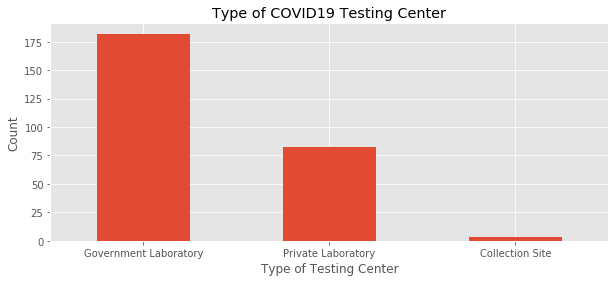

In [697]:
plt.figure(figsize=(10,4))
testing_labs.groupby('type')['lab'].count().sort_values(ascending=False).plot(kind='bar');
plt.xticks(rotation=360);
plt.xlabel("Type of Testing Center");
plt.ylabel("Count");
plt.title("Type of COVID19 Testing Center");

We can see that the testing centers are still controlled by the Government.And private centers are also in good numbers.

#### Exploring COVID19 Cases from Karnataka

In [698]:
Karnataka = patients[patients['detected_state']=="Karnataka"]

In [699]:
karnataka_district_count = Karnataka.groupby('detected_district')['detected_district'].count().sort_values(ascending=False).to_frame()
karnataka_district_count.columns = ['Count']
fig = go.Figure(data=(go.Bar(x=karnataka_district_count.index,y=karnataka_district_count['Count'])))
fig.update_layout(title="Cases Across Districts of Karnataka",xaxis=dict(title="District"),yaxis=dict(title="Count"))

Bengaluru, Mysuru, Belagavi,Vijayapura and Kalaburagi seem to have high number of cases.

In [700]:
samples_tested_karnataka = state_testing[state_testing['State']=="Karnataka"]
fig=go.Figure(data=[(go.Bar(x=samples_tested_karnataka['Date'],y=samples_tested_karnataka['TotalSamples'],name="TotalSamples",marker_line_color='black',marker_color='blue')),
                     go.Bar(x=samples_tested_karnataka['Date'],y=samples_tested_karnataka['Negative'],name="Negative",marker_line_color='black',marker_color='green'),
                     go.Bar(x=samples_tested_karnataka['Date'],y=samples_tested_karnataka['Positive'],name="Positive",marker_line_color='black',marker_color='red')])
fig.update_layout(title="Total Samples Tested, Positive and Negative Samples Across days",barmode='relative',xaxis=dict(title="Date"),yaxis=dict(title="Count"))

Karnataka is testing on an average 3000 to 4000 patients in a day and since the number of positive cases is still low, the red portion in the bar plot above is not highlighted. We have tested about 50,500 patients as on 28th of April and 503 are found out positive with COVID19. 

In [702]:
karnataka_daily_count = Karnataka.groupby('diagnosed_date')['diagnosed_date'].count().sort_values(ascending=False).to_frame()
karnataka_daily_count.columns = ['Count']
fig = go.Figure(data=(go.Bar(x=karnataka_daily_count.index,y=karnataka_daily_count['Count'])))
fig.update_layout(title="Cases in Karnataka on a daily basis",xaxis=dict(title="Date"),yaxis=dict(title="Count"))

Karnataka saw surge in the number of cases on 2 days, 16th and 17th of April, these two days contributed to 80 cases in total.